# Demonstrate the generation of random decays, sampling of photons, and grouping into coincidence windows

In [1]:
import matplotlib.pyplot as mpl
import numpy as np

from CoincidenceGeneration import *
            
def TimelinesPlot( Timelines ):
    for i, decayTimes in enumerate( Timelines ):
        dummyY = []
        for time in decayTimes:
            dummyY.append( i )

        mpl.scatter( decayTimes, dummyY )

In this example create 20 different decay channels, with an activity from 1 to 20 Bq

Points on the plot indicate decays - not yet detected photons

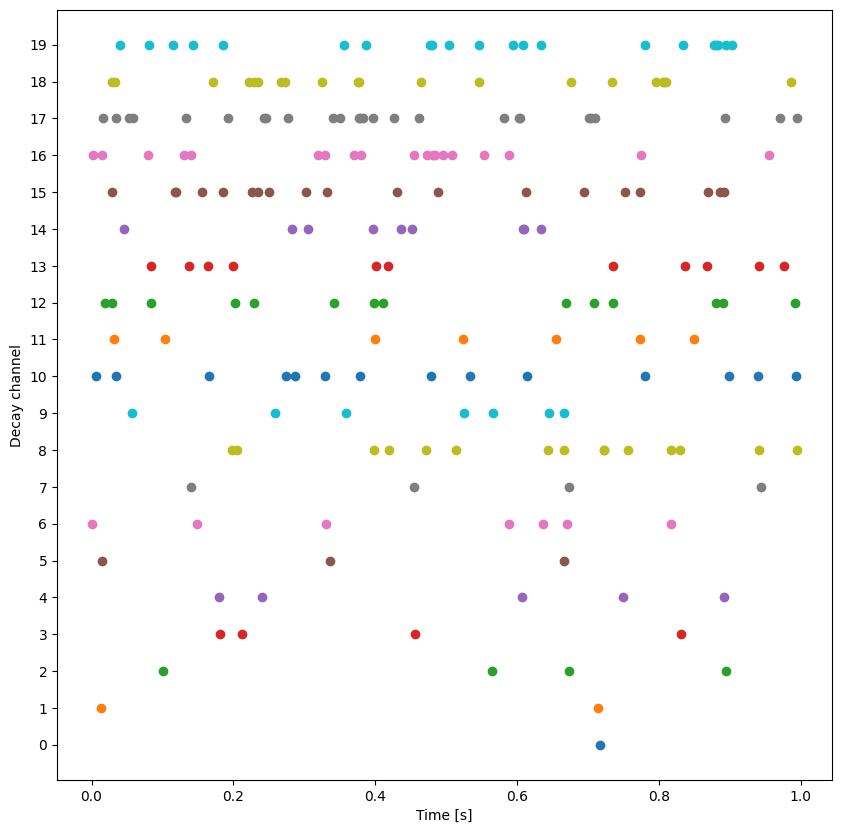

In [2]:
RNG = np.random.default_rng(1)
N_CHANNELS = 20
BATCH_SIZE = 20
DECAY_RATES = [ float(i+1) for i in range( N_CHANNELS ) ]
decayTimes, timePeriod = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG )

TimelinesPlot( decayTimes )

mpl.xlabel( "Time [s]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

Now sample a dataset to turn decays into photons. Note that one decay can mean 2 photons, or (frequently) 0 photons.

The photons themselves have a propagation time, so incorporate this information

On the timescale of these events, the photon propagation time is effectively 0, so you will not see 2 photon events as 2 points, and will not see an offset of photon detections from the decay events. Will redo later with a different timescale

Also note the photon times are quoted in nanoseconds (change this maybe?)

227340 events loaded (1000000 simulated) with average 0.250001 hits/event


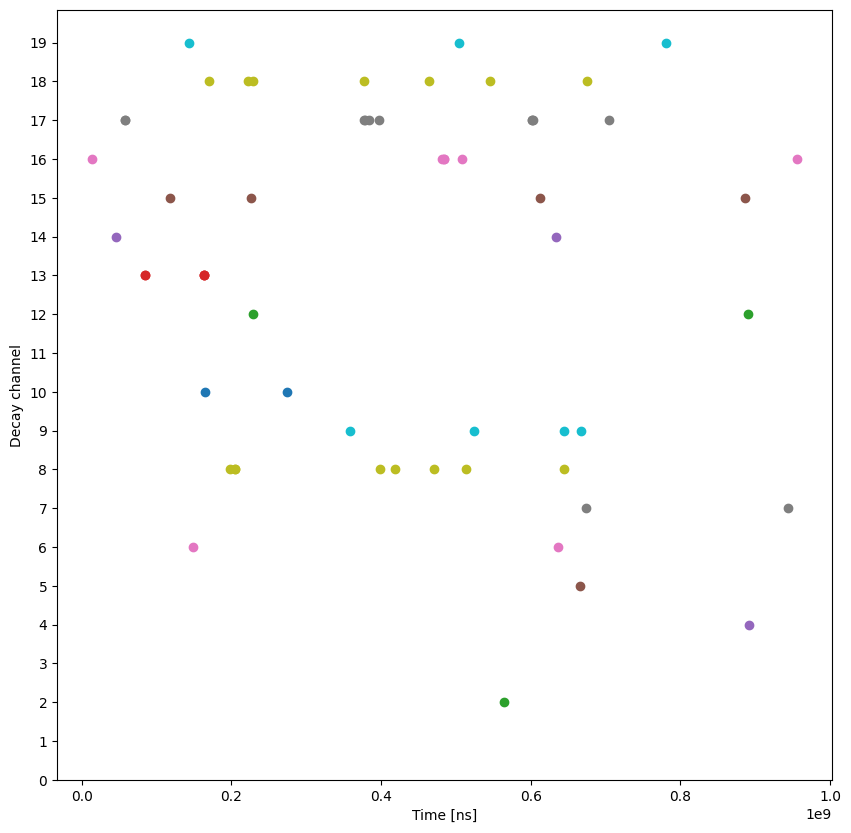

In [3]:
from SimulationDataset import *
import LegacyDatasetReader

# just use any old existing file for this demo
dataSet = SimulationDataset( "../analysis/hits.n1000000.SiemensBlock.100mm.LinearF18.700mm.-y0mm.2468.csv", 1000000 )
dataSetReader = LegacyDatasetReader.LegacyDatasetReader( dataSet )
inputData = [ dataSetReader ] * N_CHANNELS

# The "merged" part means merged across all channels, but for now show each separately
photonTimes = []
for i in range( N_CHANNELS ):
    photons = MergedPhotonStream( [decayTimes[i]], [inputData[i]], RNG )
    if len( photons ) > 0:
        photonTimes.append( photons[:, DATASET_TIME] )
    else:
        photonTimes.append( [] )

TimelinesPlot( photonTimes )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

# Now work out the coincidences

Two options: either a single window (photons join existing window if it exists) or multiple windows (one for each photon)

In [4]:
from matplotlib.patches import Rectangle

def CoincidenceBoxes( Coincidences, CoincidenceTimes, TimeWindow ):
    
    for i, coincidence in enumerate( Coincidences ):
        time = CoincidenceTimes[ i ]
        y = min( coincidence )
        height = max( coincidence ) - y
        y -= 0.1
        height += 0.2
        mpl.gca().add_patch( Rectangle( (time, y), TimeWindow, height, \
                                        linewidth=1,edgecolor='r',facecolor='none') )

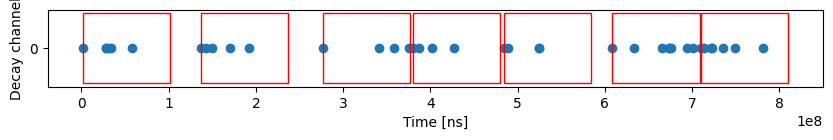

In [5]:
# Not possible to reproduce previous plots exactly since RNG effects decays and photon sampling separately
RNG = np.random.default_rng(1)

coincidences = []
coincidenceTimes = []
photonTimes = []
for coincidence in GenerateCoincidences( BATCH_SIZE, DECAY_RATES, inputData, RNG, CoincidenceWindow=1E8, SimulationWindow=1E9, MultiWindow=False ):
    coincidenceTimes.append( coincidence[0, DATASET_TIME] )
    coincidences.append( [-0.5, 0.5] ) #photon channel info not preserved any more
    for photon in coincidence:
        photonTimes.append( photon[DATASET_TIME] )
photonTimes = [photonTimes]

TimelinesPlot( photonTimes )
CoincidenceBoxes( coincidences, coincidenceTimes, 1E8 )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, 1 ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 1 )
mpl.show()

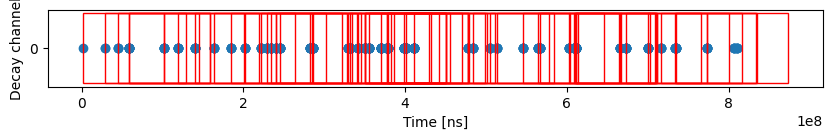

In [6]:
# Not possible to reproduce previous plots exactly since RNG effects decays and photon sampling separately
RNG = np.random.default_rng(1)

coincidences = []
coincidenceTimes = []
photonTimes = []
for coincidence in GenerateCoincidences( BATCH_SIZE, DECAY_RATES, inputData, RNG, CoincidenceWindow=1E8, SimulationWindow=1E9, MultiWindow=True ):
    coincidenceTimes.append( coincidence[0, DATASET_TIME] )
    coincidences.append( [-0.5, 0.5] ) #photon channel info not preserved any more
    for photon in coincidence:
        photonTimes.append( photon[DATASET_TIME] )
photonTimes = [photonTimes]

TimelinesPlot( photonTimes )
CoincidenceBoxes( coincidences, coincidenceTimes, 1E8 )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, 1 ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 1 )
mpl.show()

# Illustrate the effect of photon times by increasing all the decay rates by 1e9

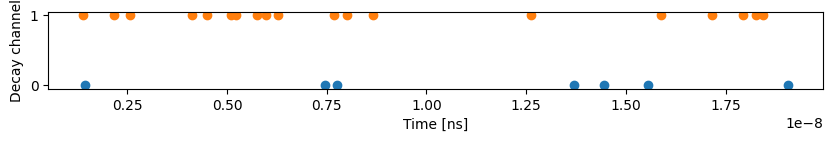

In [7]:
RNG = np.random.default_rng(1)
N_CHANNELS = 2
BATCH_SIZE = 20
DECAY_RATES = [ 5e8, 1e9 ]
decayTimes, timePeriod = TimeSeriesMultiChannel( BATCH_SIZE, DECAY_RATES, RNG )

TimelinesPlot( decayTimes )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 1 )
mpl.show()

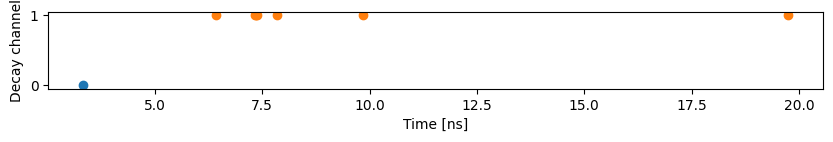

In [8]:
# The "merged" part means merged across all channels, but for now show each separately
photonTimes = []
for i in range( N_CHANNELS ):
    photons = MergedPhotonStream( [decayTimes[i]], [inputData[i]], RNG )
    if len( photons ) > 0:
        photonTimes.append( photons[:, DATASET_TIME] )
    else:
        photonTimes.append( [] )

TimelinesPlot( photonTimes )

mpl.xlabel( "Time [ns]" )
mpl.yticks( range( 0, N_CHANNELS ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 1 )
mpl.show()